<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# MODIS Level 2 - MCD14DL - Fire Radiative Power

### About

The variable that is extracted from satellite data and commonly used for satellite-based fire monitoring is 'Fire Radiative Power (FRP)'. FRP represents the rate of outgoing thermal energy coming from a burning landscape fire. It is typically expressed in MWatts (MW).

This notebook provides you an introduction to active fire / hotspot data retrieved from the [Moderate Resolution Imaging Spectroradiometer (MODIS)](https://modis.gsfc.nasa.gov/about/). It shows the structure of [MODIS Thermal Anomalies/Fire locations 1km FIRMS V0061 NRT (Vector data)](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/mcd14dl) and how to load, browse and visualize the data. 

The event featured in this notebook are the wildfires in Laos at the beginning of April 2023.

### Basic Facts

> **Spatial coverage**: `Global` <br>
> **Time step**: `Monthly` <br>
> **Data availability**: `since 2000`


### How to access the data

This notebook uses the MODIS MCD14DL dataset from the Terra and Aqua platforms. The MCD14DL dataset archive can be ordered via the [FIRMS](https://firms.modaps.eosdis.nasa.gov/download/) and are distributed in `shp`, `json` or `csv` format, which is then zipped. 

You need to [register for an Earthdata account](https://urs.earthdata.nasa.gov/) before being able to download data.

### Module outline:
- [1 - Load and browse MODIS MCD14DL Level 2 data](#modis_load)
- [2 - Visualise MODIS MCD14DL Level 2 data](#modis_vis)

<hr>

##### Load required libraries

In [5]:
import os
import numpy as np
import pandas as pd

import matplotlib.colors
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

##### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id="modis_load"></a>Load and browse MODIS Fire Radiative Power data

[OPTIONAL] The first step is to unzip the files from the zipped archive downloaded. This is optional as we have already unzipped the file for you. This is why the code is commented out.

The zipped archive contains data in a Comma-Separated Values or `csv` file and a Readme text document. The day requested was 6 April 2023.

In [3]:
#import zipfile
#with zipfile.ZipFile('../../eodata/acam_training_school/MODIS/MCD14DL/DL_FIRE_M-C61_351952.zip', 'r') as zip_ref:
#    zip_ref.extractall('../../eodata/acam_training_school/MODIS/MCD14DL/')

After we downloaded the MODIS thermal anomalies / fire locations as a `csv` file, we can open it with the pandas function `read_table()`. We additonally set specific keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index

You see below that the resulting dataframe has 6793 rows and 13 columns.

In [6]:
df = pd.read_table('../../eodata/acam_training_school/MODIS/MCD14DL/fire_nrt_M-C61_351952.csv', delimiter=',', header=[0], index_col=5)
df

latitude  longitude  brightness  scan  track  acq_time satellite  \
acq_date                                                                       
2023-04-06  22.03915  102.21639      314.21  1.04   1.02       328     Terra   
2023-04-06  21.83867  103.23786      318.21  1.00   1.00       328     Terra   
2023-04-06  21.90141  102.67371      325.43  1.01   1.01       328     Terra   
2023-04-06  21.89252  102.67224      314.42  1.01   1.01       328     Terra   
2023-04-06  21.84749  102.73362      320.33  1.01   1.00       328     Terra   
...              ...        ...         ...   ...    ...       ...       ...   
2023-04-06  14.72625   98.39695      306.32  2.15   1.43      1858      Aqua   
2023-04-06  12.74190  104.27349      305.65  1.00   1.00      1858      Aqua   
2023-04-06  12.32950  103.94816      306.76  1.00   1.00      1858      Aqua   
2023-04-06  12.32817  103.95724      307.20  1.00   1.00      1858      Aqua   
2023-04-06  12.20861   99.11723      307.23  1.74   1.29      1858      Aqua   

           instrument  confidence version  bright_t31    frp daynight  
acq_date                                                               
2023-04-06      MODIS          62  6.1NRT      299.88   7.90        D  
2023-04-06      MODIS          70  6.1NRT      302.67  10.35        D  
2023-04-06      MODIS          79  6.1NRT      302.40  15.24        D  
2023-04-06      MODIS          43  6.1NRT      300.79   4.09        D  
2023-04-06      MODIS          73  6.1NRT      300.96  10.52        D  
...               ...         ...     ...         ...    ...      ...  
2023-04-06      MODIS          11  6.1NRT      293.13  18.68        N  
2023-04-06      MODIS          64  6.1NRT      294.47   4.08        N  
2023-04-06      MODIS          66  6.1NRT      296.47   4.76        N  
2023-04-06      MODIS          67  6.1NRT      295.84   5.15        N  
2023-04-06      MODIS          71  6.1NRT      291.28  15.94        N  

[6793 rows x 13 columns]

From the dataframe above, let us only select the columns of interest for us. This makes the handling of the dataframe much easier. The columns of interest are: `acq_date`, `latitude`, `longitude`, `confidence` and `frp`. You can use the function `filter()` to select specific columns.

In [7]:
frp = df.filter(['acq_date','latitude','longitude','confidence','frp'])
frp

latitude  longitude  confidence    frp
acq_date                                          
2023-04-06  22.03915  102.21639          62   7.90
2023-04-06  21.83867  103.23786          70  10.35
2023-04-06  21.90141  102.67371          79  15.24
2023-04-06  21.89252  102.67224          43   4.09
2023-04-06  21.84749  102.73362          73  10.52
...              ...        ...         ...    ...
2023-04-06  14.72625   98.39695          11  18.68
2023-04-06  12.74190  104.27349          64   4.08
2023-04-06  12.32950  103.94816          66   4.76
2023-04-06  12.32817  103.95724          67   5.15
2023-04-06  12.20861   99.11723          71  15.94

[6793 rows x 4 columns]

Next, we remove the rows which have a confidence level below 60 percent. You see that the entries of fire hotspots reduced to 4753 rows.

In [9]:
frp_conf = frp[frp['confidence'] >= 60]
frp_conf

latitude  longitude  confidence    frp
acq_date                                          
2023-04-06  22.03915  102.21639          62   7.90
2023-04-06  21.83867  103.23786          70  10.35
2023-04-06  21.90141  102.67371          79  15.24
2023-04-06  21.84749  102.73362          73  10.52
2023-04-06  21.84614  102.74313          69   8.35
...              ...        ...         ...    ...
2023-04-06  13.87486  106.95175          70   7.68
2023-04-06  12.74190  104.27349          64   4.08
2023-04-06  12.32950  103.94816          66   4.76
2023-04-06  12.32817  103.95724          67   5.15
2023-04-06  12.20861   99.11723          71  15.94

[4753 rows x 4 columns]

## <a id="modis_load"></a>Visualise MODIS MCD14DL Level 2 data

You can make use of the `ListedColorMap` function from the matplotlib library to define the colors for each fire radiative power (FRP) class.

In [10]:
frp_cm = ListedColormap([[0, 0, 255./255.],
                                 [176./255., 196./255., 222./255.],
                                 [255./255., 255./255., 0],
                                 [1., 140./255., 0],
                                 [178./255., 34./255., 34./255.],
                                 [1, 0, 0]])

You can define the levels for the respective FRP classes in a list stored in the variable `bounds`. You can also use the `.BoundaryNorm()` function from `matplotlib.colors` to define the norm that you will use for plotting later. 

In [11]:
bounds = [0, 30, 40, 60, 80, 120, 500]
norm = BoundaryNorm(bounds, frp_cm.N)

<br>

The last step is to visualize the `FRP` data with matplotlib's `scatter` function.

The plotting code can be divided in five main parts:
* **Initiate a matplotlib figure**: Initiate a matplotlib plot and define the size of the plot
* **Specify coastlines, borders and a grid**: specify additional features to be added to the plot
* **Plotting function**: plot the data with the plotting function `scatter`
* **Specify color bar**: specify the color bar properties
* **Set plot title**: specify title of the plot

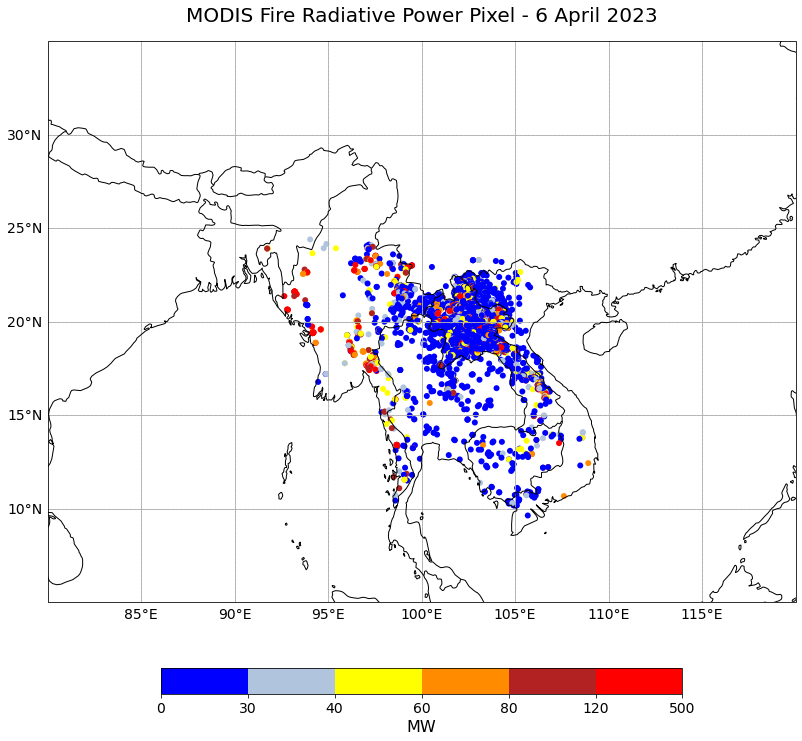

In [12]:
# Initiate a matplotlib figure
fig=plt.figure(figsize=(20, 12))
ax=plt.axes(projection=ccrs.PlateCarree())

# Specify coastlines and borders
ax.coastlines(zorder=3)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1, zorder=3)

# Specify a grid
gl = ax.gridlines()
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels=False
gl.right_labels=False
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':14}
gl.ylabel_style={'size':14}

# Set the plot extent to France
ax.set_extent([80, 120, 5, 35], ccrs.PlateCarree())

# Plotting function
img1 = plt.scatter(frp_conf['longitude'],frp_conf['latitude'], c=frp_conf['frp'],
                   edgecolors='none',
                   cmap=frp_cm,
                   norm=norm,
                   zorder=2)


# Specify colorbar 
cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
cbar.set_label('MW',fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Set plot title
ax.set_title('MODIS Fire Radiative Power Pixel - 6 April 2023', fontsize=20, pad=20.0)

# Show plot
plt.show()

<hr>

### References
* MODIS Collection 61 Hotspot / Active Fire Detections MCD14ML distributed from NASA FIRMS. Available on-line https://earthdata.nasa.gov/firms. doi:10.5067/FIRMS/MODIS/MCD14ML

* Some code in this notebook was adapted from the following source:
    * origin: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/90_workshops/202005_fire_workshop/62_case_study_sweden_fires_summer_2018_self_paced.ipynb
    * copyright: 2022, EUMETSAT
    * license: MIT
    * retrieved: 2022-06-28 by Sabrina Szeto

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>